In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read in telecom customer info from csv
customers = pd.read_csv("mytable_customer_details - CustDetails_Values.csv")
customers.shape

(7049, 26)

In [6]:
#Select month-to-month customers only
customers = customers[customers.contract_type == 0]
customers.shape

(3876, 26)

In [7]:
#Take a look at the data
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3876 entries, 1 to 7046
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              3873 non-null   object
 1   gender                   3876 non-null   object
 2   is_senior_citizen        3876 non-null   int64 
 3   partner                  3876 non-null   object
 4   dependents               3876 non-null   object
 5   phone_service            3876 non-null   int64 
 6   internet_service         3876 non-null   int64 
 7   contract_type            3876 non-null   int64 
 8   payment_type             3876 non-null   object
 9   monthly_charges          3876 non-null   object
 10  total_charges            3876 non-null   object
 11  churn                    3876 non-null   object
 12  tenure                   3876 non-null   int64 
 13  tenure_rounded           3876 non-null   int64 
 14  is_female                3876 non-null  

,is_senior_citizen,phone_service,internet_service,contract_type,tenure,tenure_rounded,is_female,has_churned,has_phone,has_internet,partner_dependents
count,3876.000000,3876.000000,3876.000000,3876.0,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000
mean,0.208204,1.285088,1.413829,0.0,18.016770,18.016770,0.496904,0.427245,0.902735,0.864809,0.763932
std,0.406076,0.631226,0.716302,0.0,17.703813,17.703813,0.500055,0.494742,0.296357,0.341971,1.090841
min,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.0,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,2.000000,0.0,12.000000,12.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,2.000000,2.000000,0.0,28.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.000000,2.000000,0.0,72.000000,72.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [21]:
#Fix the booleans
customers = customers.astype({
    'is_senior_citizen':'bool',
    'is_female':'bool',
    'has_churned':'bool',
    'has_phone':'bool',
    'has_internet':'bool'
})

In [50]:
#Fix dollar strings to floats
def fix_dollars(string):
    return float(string.replace('$','').replace(',',''))

In [51]:
customers.monthly_charges = customers.monthly_charges.apply(fix_dollars)
customers.total_charges = customers.total_charges.apply(fix_dollars)
customers.average_monthly_charges = customers.average_monthly_charges.apply(fix_dollars)

In [52]:
#How many of these customers have churned?
customers_churned = customers[customers.has_churned == 1]
len(customers_churned)

1656

In [53]:
#What percentage is this of all month-to-month customers?
round(len(customers_churned) / len(customers), 2)

0.43

In [54]:
#This means 57% did not churn, while 43% did. 
#Start looking for the drivers of churn. What factors do the churned customers have in common?
#How many are senior citizens?
len(customers_churned[customers_churned.is_senior_citizen == 1])

441

In [55]:
#About a quarter are senior citizens.
#How many non-churned customers are senior citizens?
len(customers[(customers.is_senior_citizen == 1) & (customers.has_churned == 0)])

366

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


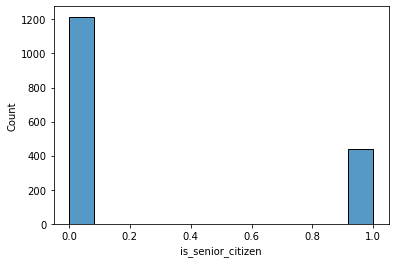

In [56]:
#Graph the difference
sns.histplot(customers_churned.is_senior_citizen)
plt.show()

In [57]:
customers_churned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 2 to 7045
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              1654 non-null   object 
 1   gender                   1656 non-null   object 
 2   is_senior_citizen        1656 non-null   bool   
 3   partner                  1656 non-null   object 
 4   dependents               1656 non-null   object 
 5   phone_service            1656 non-null   int64  
 6   internet_service         1656 non-null   int64  
 7   contract_type            1656 non-null   int64  
 8   payment_type             1656 non-null   object 
 9   monthly_charges          1656 non-null   float64
 10  total_charges            1656 non-null   float64
 11  churn                    1656 non-null   object 
 12  tenure                   1656 non-null   int64  
 13  tenure_rounded           1656 non-null   int64  
 14  is_female               

In [58]:
#What percentage of people that churned have phone service?
round(len(customers_churned[customers_churned.has_phone == True]) / len(customers_churned),2)

0.91

In [59]:
#91% had phone service
#What percentage of people that did not churn have phone service?
round(len(customers[(customers.has_phone == 1) & (customers.has_churned == False)]) / len(customers[customers.has_churned == False]),2)


0.9

In [60]:
#90% had phone service. Phone service in general does not appear to be a driver of churn
#What percentage of people that did not churn have internet service?
round(len(customers_churned[customers_churned.has_internet == True]) / len(customers_churned),2)

0.94

In [61]:
#94% had internet service.
#What percentage of people that did not churn have internet service?
customers_unchurned = customers[customers.has_churned == False]
round(len(customers_unchurned[customers_unchurned.has_internet == True]) / len(customers_unchurned),2)

0.81

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

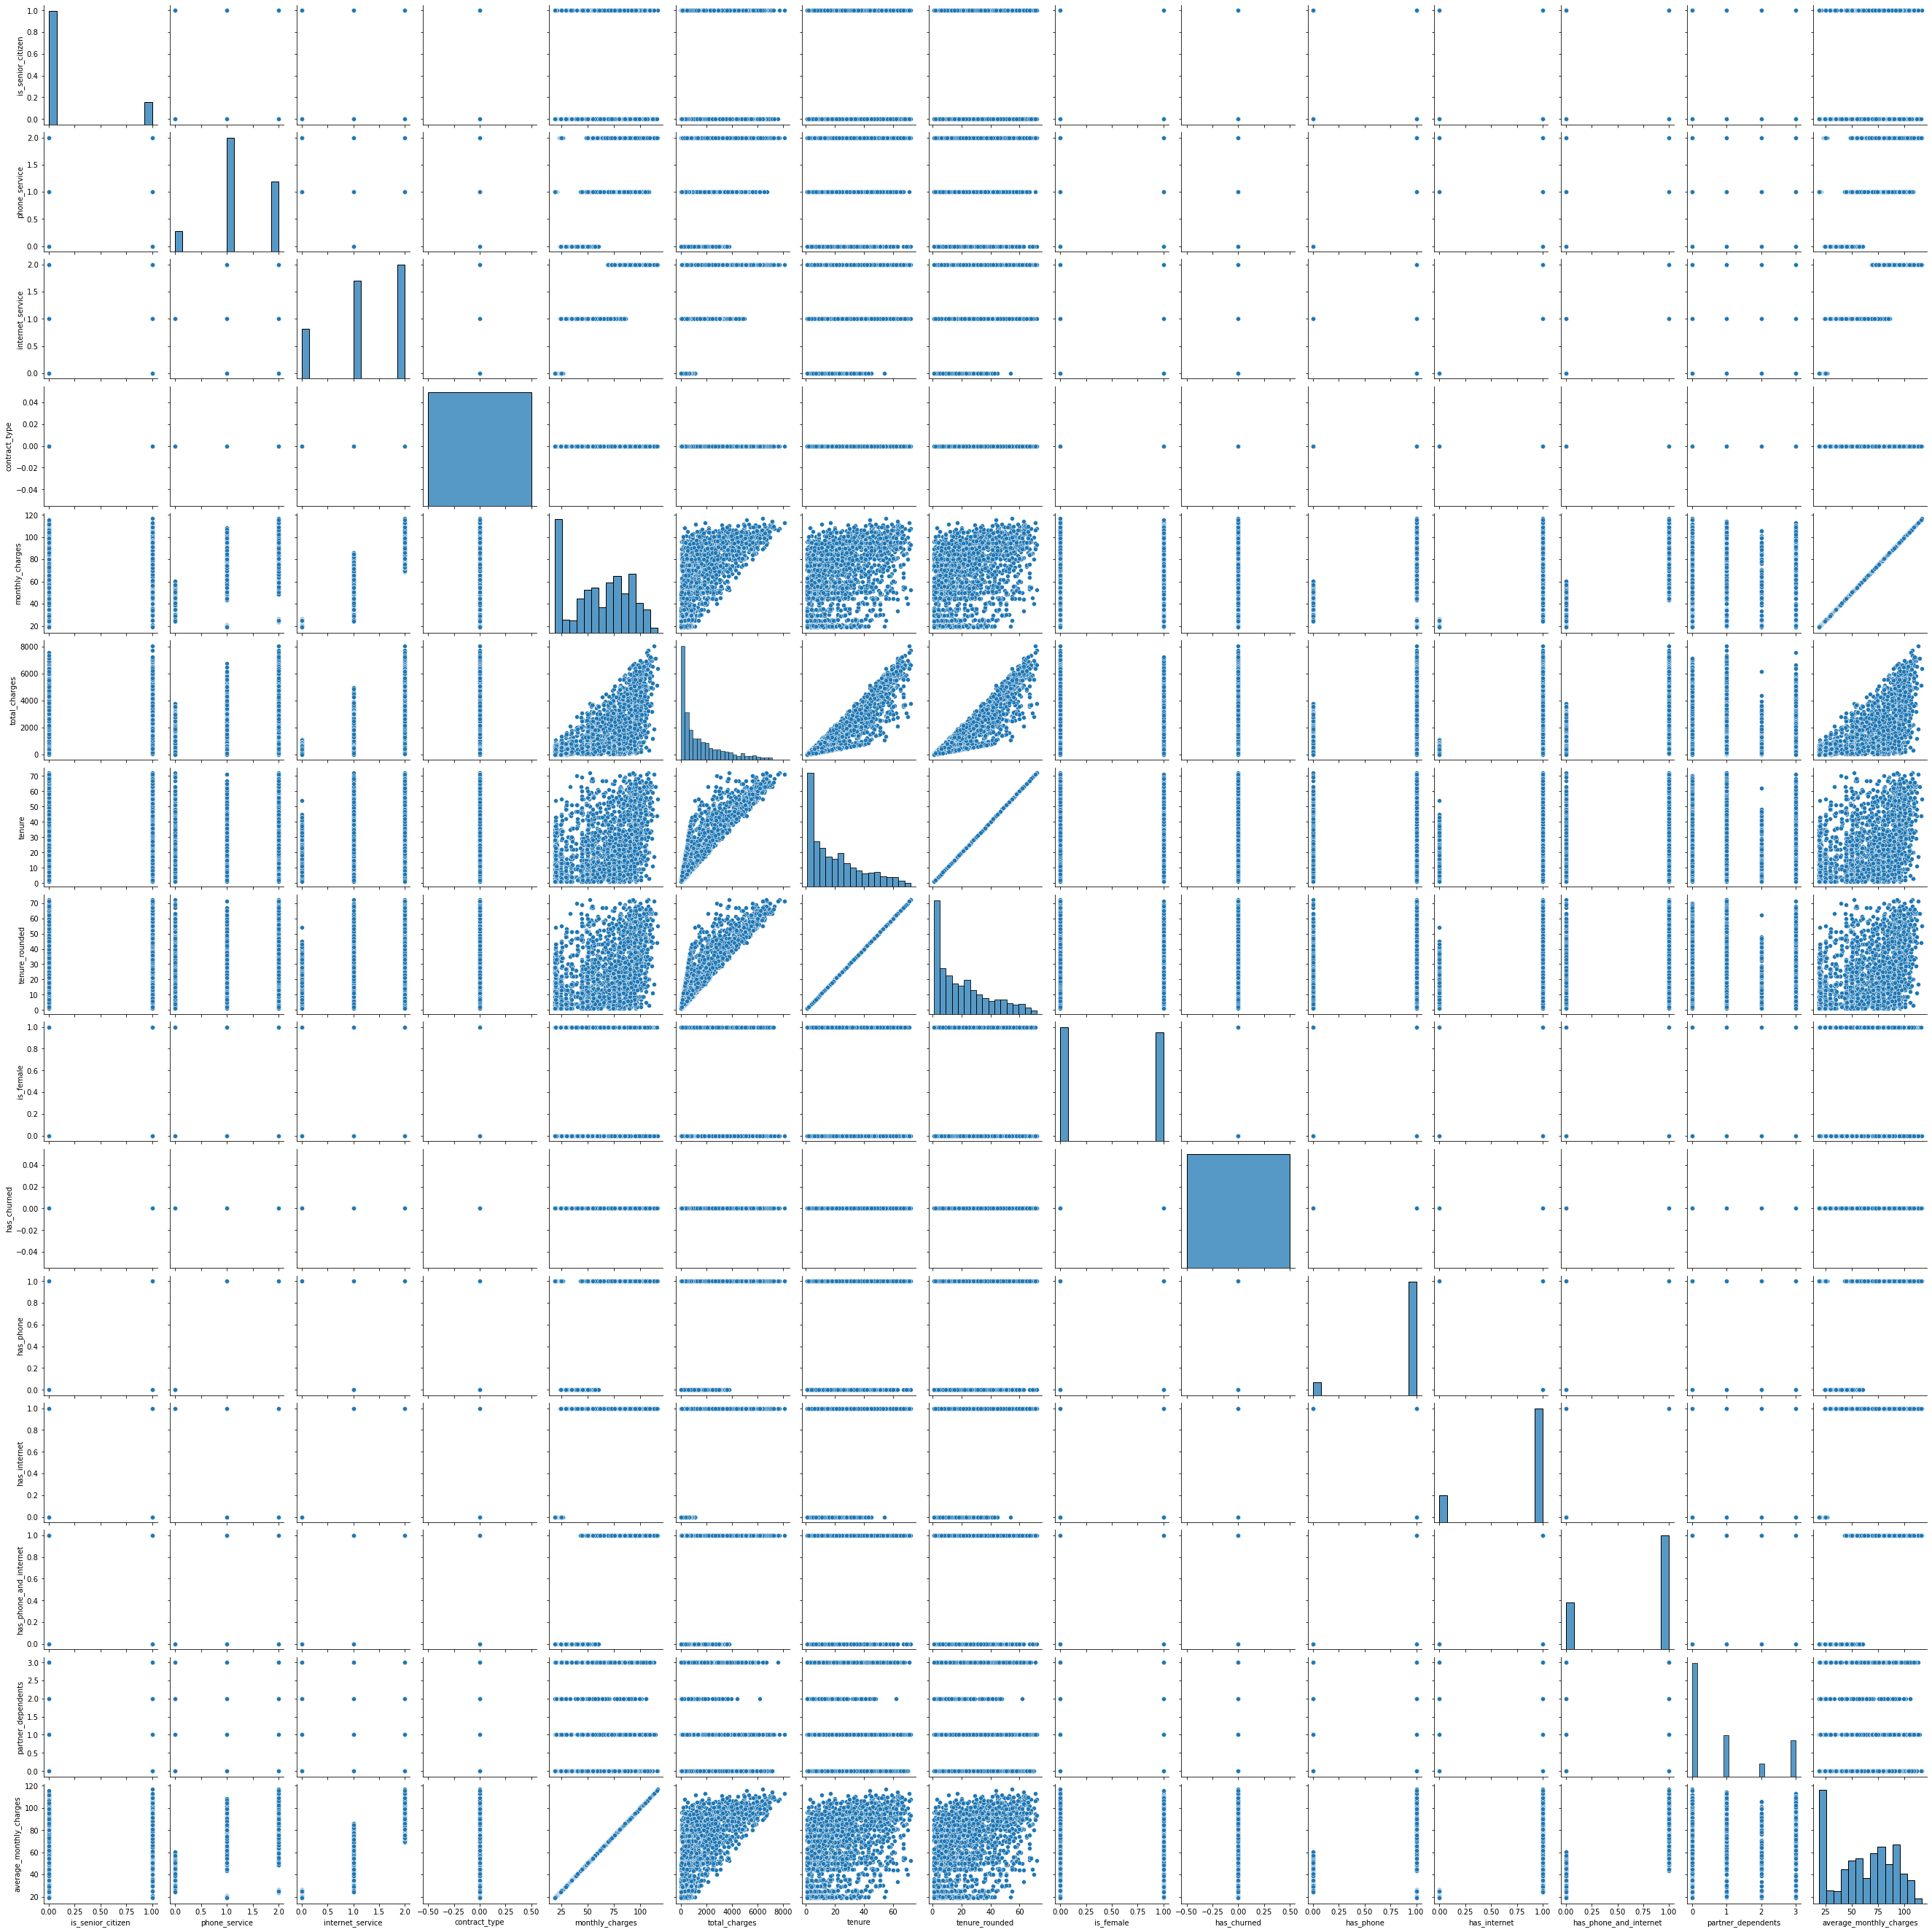

In [64]:
#Only 81% of unchurned customers had internet. This could be a driver, but let's keep looking
#try plotting everything and see what you see
sns.pairplot(customers_unchurned)
plt.show()

phone_service,0,1,2
has_churned,,,
False,0.100450,0.557207,0.342342
True,0.092995,0.471014,0.435990


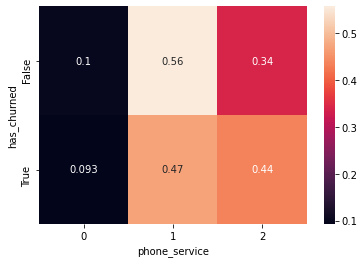

In [77]:
#Try a few heatmaps
data = pd.crosstab(customers.has_churned, customers.phone_service, normalize = 'index')
sns.heatmap(data, annot = True)
data

internet_service,0,1,2
has_churned,,,
False,0.191441,0.373423,0.435135
True,0.059783,0.238527,0.701691


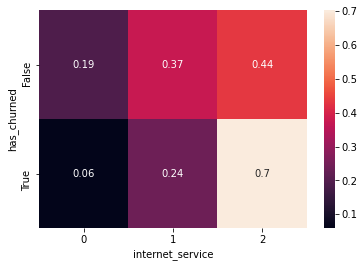

In [73]:
data = pd.crosstab(customers.has_churned, customers.internet_service, normalize = 'index')
sns.heatmap(data, annot=True)
data

gender,Female,Male
has_churned,,
False,1083,1137
True,843,813


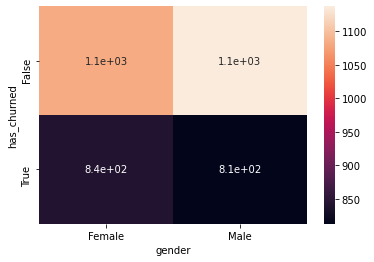

In [69]:
data = pd.crosstab(customers.has_churned, customers.gender)
sns.heatmap(data, annot = True)
data

partner,No,Yes
has_churned,,
False,1380,840
True,1115,541


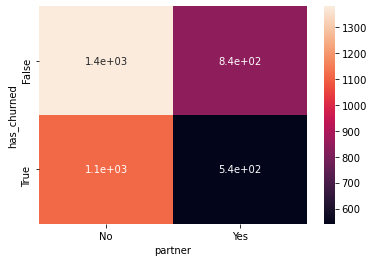

In [70]:
data = pd.crosstab(customers.has_churned, customers.partner)
sns.heatmap(data, annot = True)
data

dependents,No,Yes
has_churned,,
False,0.761261,0.238739
True,0.842995,0.157005


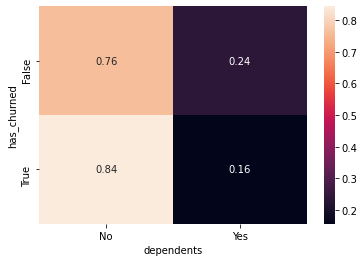

In [74]:
data = pd.crosstab(customers.has_churned, customers.dependents, normalize = 'index')
sns.heatmap(data, annot = True)
data

phone_service,0,1,2
internet_service,,,
0,0.000000,0.056763,0.003019
1,0.092995,0.114734,0.030797
2,0.000000,0.299517,0.402174


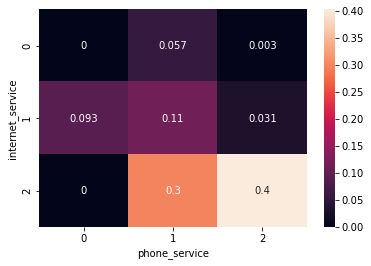

In [95]:
#The following is for churned customers
#Normalized to all instead of index
data = pd.crosstab(customers_churned.internet_service, customers_churned.phone_service, normalize = 'all')
sns.heatmap(data, annot = True)
data

phone_service,0,1,2
internet_service,,,
0,0.00000,0.172973,0.018468
1,0.10045,0.197297,0.075676
2,0.00000,0.186937,0.248198


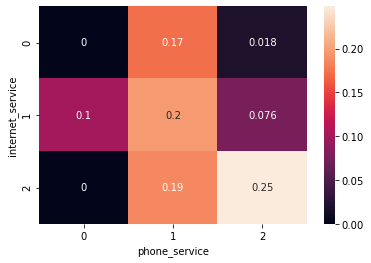

In [96]:
#The following is for unchurned customers
#Normalized to all instead of index
data = pd.crosstab(customers_unchurned.internet_service, customers_unchurned.phone_service, normalize = 'all')
sns.heatmap(data, annot = True)
data

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
internet_service,,,,
0,0.131313,0.060606,0.131313,0.676768
1,0.101266,0.126582,0.486076,0.286076
2,0.128227,0.104991,0.679002,0.087780


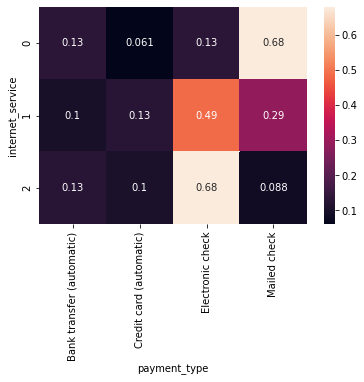

In [78]:
#For churned customers:
data = pd.crosstab(customers_churned.internet_service, customers_churned.payment_type, normalize = 'index')
sns.heatmap(data, annot = True)
data

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
internet_service,,,,
0,0.122353,0.138824,0.131765,0.607059
1,0.190591,0.162847,0.340169,0.306393
2,0.184265,0.177019,0.536232,0.102484


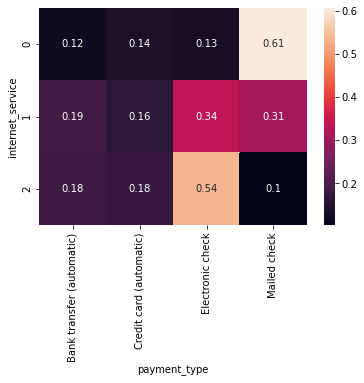

In [79]:
#For unchurned customers
data = pd.crosstab(customers_unchurned.internet_service, customers_unchurned.payment_type, normalize = 'index')
sns.heatmap(data, annot = True)
data

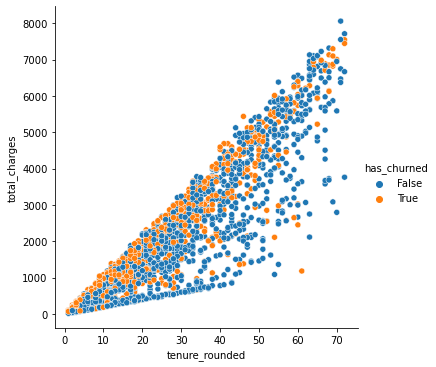

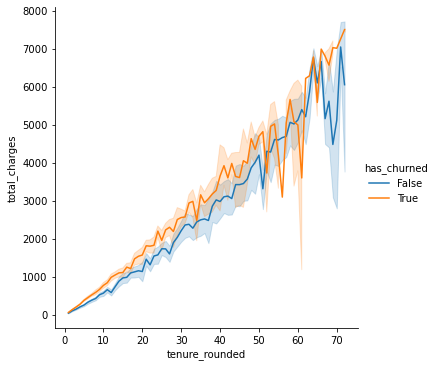

In [93]:
sns.relplot(x='tenure_rounded', y='total_charges', hue = 'has_churned', data = customers)
sns.relplot(kind = 'line', x='tenure_rounded', y='total_charges', hue='has_churned', data = customers)

plt.show()

In [ ]:
#Looks like churned customers were paying more in total charges than unchurned

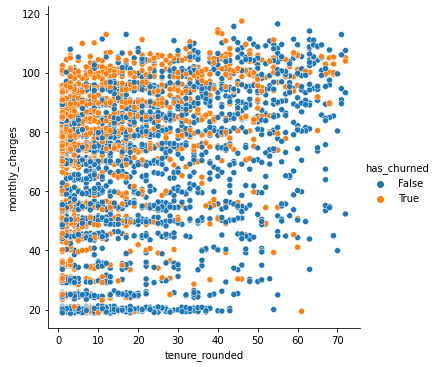

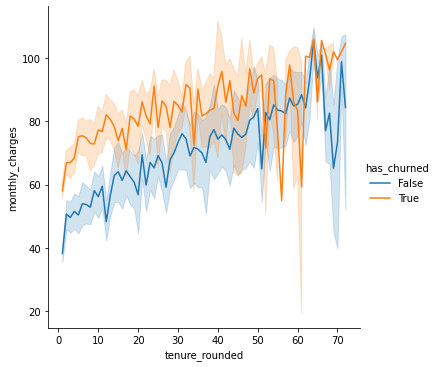

In [91]:
sns.relplot(x='tenure_rounded', y='monthly_charges', hue = 'has_churned', data = customers)
sns.relplot(kind = 'line', x='tenure_rounded', y='monthly_charges', hue='has_churned', data = customers)
plt.show()

In [ ]:
#Looks like churned customers were paying more every month on average than unchurned
#This makes sense, since the majority of churned customers had more than one phone line and
#fiber optic internet

In [84]:
customers_churned.tenure.mean()

14.001811594202898

In [86]:
customers_unchurned.tenure.mean()

21.011711711711712

In [87]:
customers_churned.monthly_charges.mean()

72.9937198067633

In [88]:
customers_unchurned.monthly_charges.mean()

61.46263513513513

In [89]:
customers_churned[customers_churned.tenure_rounded == 14].total_charges.mean()

1098.8500000000001

In [92]:
customers_unchurned[customers_unchurned.tenure_rounded == 14].total_charges.mean()

881.5202702702703

In [ ]:
customers